# Modeling

## Objectives

This notebook implements **predictive modeling** using the feature-engineered datasets produced in Notebook 05. The goal is to build, tune, and evaluate models for predicting engagement having set `popularity_score` as a proxy.

A stretch goal aims to perform clustering on user profiles for additional business insights and segmentation strategies.

Key priorities:

* Build regression/classification models for personalization and recommendations
* Evaluate model performance using appropriate metrics
* Document modeling choices and rationale

Stretch goals:
* Exploreclustering models for user segmentation

---

## Inputs

* `final_features.csv` — feature-engineered internal catalog
* `user_profile_features.csv` — feature-engineered supply catalog

---

## Tasks in This Notebook

1. **Load Feature-Engineered Data**
   Import datasets prepared for modeling.

2. **Model Selection and Training**
   Choose appropriate algorithms for clustering, regression, and/or classification. Train models using cross-validation and hyperparameter tuning.

3. **Model Evaluation**
   Assess model performance using metrics such as silhouette score (clustering), RMSE/MAE (regression), or accuracy/AUC (classification).

4. **Interpretation and Documentation**
   Analyze feature importances, cluster characteristics, and document modeling decisions.

5. **Save Model Artifacts**
   Export trained models, evaluation reports, and predictions for downstream use.

---

## Outputs

* Trained recommendation models
* Evaluation metrics and model comparison
* Model artifacts saved to `outputs/models/`
* Documentation of modeling logic and business rationale

Stretch Outputs:
* User segments and profiles from clustering analysis

>**Note:**
>This notebook focuses on **model training and evaluation**.
>Feature engineering steps are completed in the previous notebook.

# Set up

## Navigate to the Parent Directory

Before combining and saving datasets, it’s often helpful to move to a parent directory so that file operations (like loading or saving data) are easier and more organized. 

Before using the Python’s built-in os module to move one level up from the current working directory, it is advisable to inspect the current directory.

In [2]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(f'Current directory: {current_dir}')

Current directory: c:\Users\reisl\OneDrive\Documents\GitHub\bookwise-analytics\notebooks


To change to parent directory (root folder), run the code below. If you are already in the root folder, you can skip this step.

In [3]:
# Change the working directory to its parent
os.chdir(os.path.dirname(current_dir))
print('Changed directory to parent.')

# Get the new current working directory (the parent directory)
current_dir = os.getcwd()
print(f'New current directory: {current_dir}')

Changed directory to parent.
New current directory: c:\Users\reisl\OneDrive\Documents\GitHub\bookwise-analytics


## Load Datasets

In this step, we load the previously cleaned datasets.

In [4]:
import pandas as pd
v = '1'

final_features = pd.read_csv(f'outputs/datasets/modeling/{v}/final_features.csv')
# drop 'gb_book_id' and 'goodreads_id_clean' columns after loading final_features
final_features = final_features.drop(
    columns=[col for col in ['gb_book_id', 'goodreads_id_clean'] if col in final_features.columns],
    errors='ignore'
)
user_profiles = pd.read_csv(f'outputs/datasets/modeling/{v}//user_profile_features.csv')

print(final_features.info())
print(user_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   publication_year              9760 non-null   float64
 1   publication_decade            9760 non-null   float64
 2   publication_date_final        9760 non-null   object 
 3   has_award_final               9761 non-null   float64
 4   is_major_publisher_final      9761 non-null   float64
 5   external_rating               7834 non-null   float64
 6   external_likedpct             7834 non-null   float64
 7   external_bbe_ratings_1        7834 non-null   float64
 8   external_bbe_ratings_2        7834 non-null   float64
 9   external_bbe_ratings_3        7834 non-null   float64
 10  external_bbe_ratings_4        7834 non-null   float64
 11  external_bbe_ratings_5        7834 non-null   float64
 12  external_bbe_ratings_1_share  7834 non-null   float64
 13  ext

# Modeling

## Inspect and Prepare the Data

In this step, we inspect the loaded datasets for any inconsistencies or missing values that may affect modeling.

In [5]:
# Inspect target and features
print(final_features.shape)
print(final_features['popularity_score'].describe().round(2))
print(final_features.isnull().sum())

(9761, 34)
count    9761.00
mean       -0.00
std         2.07
min        -6.12
25%        -1.40
50%        -0.26
75%         1.11
max        10.91
Name: popularity_score, dtype: float64
publication_year                   1
publication_decade                 1
publication_date_final             1
has_award_final                    0
is_major_publisher_final           0
external_rating                 1927
external_likedpct               1927
external_bbe_ratings_1          1927
external_bbe_ratings_2          1927
external_bbe_ratings_3          1927
external_bbe_ratings_4          1927
external_bbe_ratings_5          1927
external_bbe_ratings_1_share    1927
external_bbe_ratings_2_share    1927
external_bbe_ratings_3_share    1927
external_bbe_ratings_4_share    1927
external_bbe_ratings_5_share    1927
genre_count                        0
has_genres                         0
is_top_genre                       0
is_top_author                      0
in_series                          0


       publication_year  publication_decade  has_award_final  \
count       9760.000000         9760.000000      9761.000000   
mean        1993.400615         1989.151639         0.365844   
std           32.523414           32.835990         0.481691   
min         1678.000000         1670.000000         0.000000   
25%         1991.000000         1990.000000         0.000000   
50%         2004.000000         2000.000000         0.000000   
75%         2011.000000         2010.000000         1.000000   
max         2020.000000         2020.000000         1.000000   

       is_major_publisher_final  external_rating  external_likedpct  \
count               9761.000000      7834.000000        7834.000000   
mean                   0.577297         4.021399          92.847843   
std                    0.494014         0.239987           4.032908   
min                    0.000000         2.510000          46.000000   
25%                    0.000000         3.870000          91.000000 

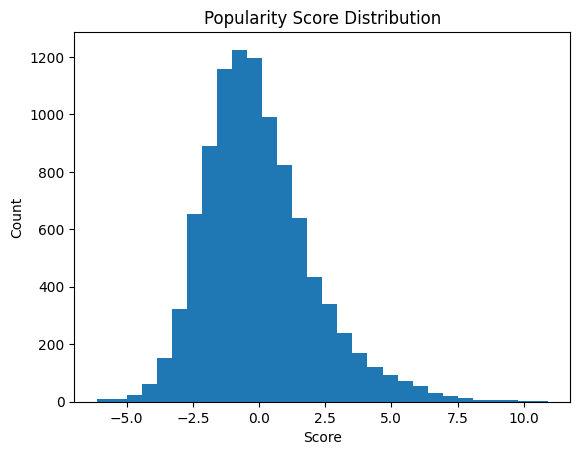

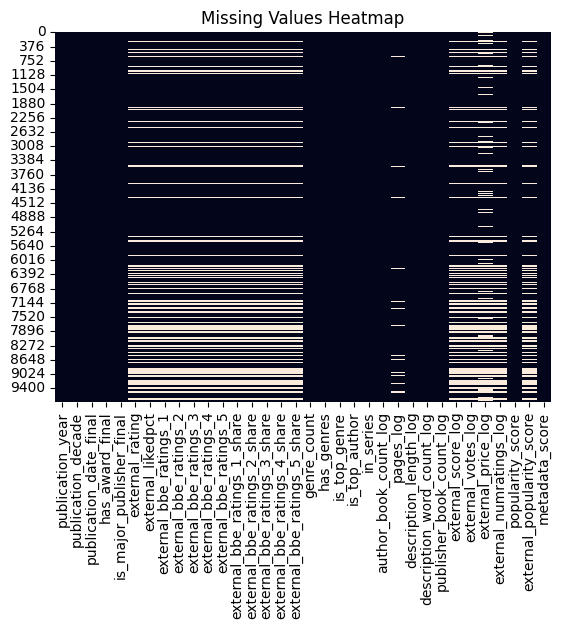

publication_year                   1
publication_decade                 1
publication_date_final             1
has_award_final                    0
is_major_publisher_final           0
external_rating                 1927
external_likedpct               1927
external_bbe_ratings_1          1927
external_bbe_ratings_2          1927
external_bbe_ratings_3          1927
external_bbe_ratings_4          1927
external_bbe_ratings_5          1927
external_bbe_ratings_1_share    1927
external_bbe_ratings_2_share    1927
external_bbe_ratings_3_share    1927
external_bbe_ratings_4_share    1927
external_bbe_ratings_5_share    1927
genre_count                        0
has_genres                         0
is_top_genre                       0
is_top_author                      0
in_series                          0
author_book_count_log              0
pages_log                        395
description_length_log             0
description_word_count_log         0
publisher_book_count_log           0
e

In [6]:
# Summary statistics
print(final_features.describe())

# Visualize target distribution
import matplotlib.pyplot as plt
plt.hist(final_features['popularity_score'], bins=30)
plt.title('Popularity Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Missing value analysis
import seaborn as sns
sns.heatmap(final_features.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Show missing values per column
print(final_features.isnull().sum())

The data exploration reveals that most internal features are complete, but several external features, such as `external_rating`, `external_likedpct`, `external_score_log`, `external_votes_log`, `external_numratings_log`, and `external_popularity_score` have substantial missing values (up to 20% of rows). This is expected since not all books have external metadata available.

The missing value heatmap confirms that this missingness is concentrated in external columns, while engineered and internal features are largely unaffected. Summary statistics show that the target variable `popularity_score` is well-distributed and suitable for regression, but careful handling of missing data is essential to avoid bias and ensure robust model training.

To address this, we will use a modular preprocessing pipeline with custom transformers. The **DropColumns** transformer removes columns with excessive missingness or low predictive value. The **FillNAWithValue** transformer fills specific columns (such as `external scores`) with a sentinel value (-1), allowing the model to distinguish between true zeros and missing data. The **AddMissingFlags** transformer creates binary flags for each imputed column, enabling the model to learn patterns associated with missingness itself.

Numerical features are imputed using the median and scaled, while categorical features are imputed with the most frequent value and one-hot encoded. This approach ensures that all rows are retained for modeling, missingness is explicitly flagged, and the model can leverage both observed and imputed data. The pipeline is flexible and can be adapted for different imputation strategies if needed.

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel

# custom transformer to drop columns
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(columns=self.columns)

# custom transformer to fill specific columns with -1
class FillNAWithValue(BaseEstimator, TransformerMixin):
    def __init__(self, columns, value):
        self.columns = columns
        self.value = value
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[col] = X[col].fillna(self.value)
        return X

# custom transformer to add missingness flags
class AddMissingFlags(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = X.copy()
        for col in self.columns:
            X[f'{col}_was_missing'] = X[col].isnull().astype(int)
        return X

num_cols = [
    'external_likedpct', 'pages_log', 'external_score_log',
    'external_votes_log', 'external_numratings_log', 
    # 'external_bbe_ratings_1', 'external_bbe_ratings_2', 'external_bbe_ratings_3',
    # 'external_bbe_ratings_4', 'external_bbe_ratings_5',
    'external_bbe_ratings_1_share', 'external_bbe_ratings_2_share',
    'external_bbe_ratings_3_share', 'external_bbe_ratings_4_share',
    'external_bbe_ratings_5_share',
]
cat_cols = ['publication_year', 'publication_decade']
drop_cols = ['external_price_log', 'publication_date_final',
             'external_bbe_ratings_1', 'external_bbe_ratings_2', 'external_bbe_ratings_3',
             'external_bbe_ratings_4', 'external_bbe_ratings_5',
             ]
fill_minus1_cols = ['external_rating', 'external_popularity_score']
flag_cols = fill_minus1_cols + num_cols

# modular preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('drop_cols', DropColumns(drop_cols)),
    ('fill_minus1', FillNAWithValue(fill_minus1_cols, -1)),
    ('add_flags', AddMissingFlags(flag_cols)),
    ('col_transform', ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ], remainder='passthrough')),
])

In [8]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Author: Code Institute Scikit-Learn Unit 6: Cross Validation Search Part 2
def PipelineOptimization(model):
    pipeline_base = Pipeline([
        # use custom modular preprocessing pipeline
        ('preprocessing', preprocessing_pipeline),
        ('feat_selection', SelectFromModel(model)),
        ('model', model),
    ])
    return pipeline_base

## Baseline Model

To establish a reference point, we fit a simple baseline model using Linear Regression. This helps us understand how much improvement our advanced models provide over a basic approach.

### Linear Regression Baseline

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    root_mean_squared_error,
    mean_absolute_error
)
from sklearn.model_selection import train_test_split

# define features and target
X = final_features.drop(columns=['popularity_score'])
y = final_features['popularity_score']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# use PipelineOptimization for baseline
baseline_pipeline = PipelineOptimization(LinearRegression())

baseline_pipeline.fit(X_train, y_train)
y_pred_baseline = baseline_pipeline.predict(X_test)

baseline_r2 = r2_score(y_test, y_pred_baseline)
baseline_rmse = root_mean_squared_error(y_test, y_pred_baseline)
baseline_mae = mean_absolute_error(y_test, y_pred_baseline)

print(f"Baseline Linear Regression R2: {baseline_r2:.3f}")
print(f"Baseline Linear Regression RMSE: {baseline_rmse:.3f}")
print(f"Baseline Linear Regression MAE: {baseline_mae:.3f}")


Baseline Linear Regression R2: 0.800
Baseline Linear Regression RMSE: 0.966
Baseline Linear Regression MAE: 0.590


In [10]:
import json
import os

baseline_metrics = {
    "rmse": baseline_rmse,
    "r2": baseline_r2,
    "mae": baseline_mae
}

baseline_metrics_path = os.path.join("outputs", "models", "baseline_metrics.json")
os.makedirs(os.path.dirname(baseline_metrics_path), exist_ok=True)

with open(baseline_metrics_path, "w") as f:
    json.dump(baseline_metrics, f)

The baseline **Linear Regression** model achieved an R² of 0.80 and an RMSE of 0.97 for predicting book popularity scores. These results indicate that the model explains 80% of the variance in engagement and maintains an average prediction error just under 1 point.

Based on the business objectives and success indicators outlined in the README (specifically, RMSE < 1.0 or R² > 0.7), this baseline performance suggests that the initial success criteria are realistic and attainable. With further advanced modeling, even stronger results are likely achievable for Bookwise Analytics.

## Additional Models Comparison

Multiple regression models will be evaluated, including Linear Regression, Decision Tree, Random Forest, Extra Trees, and Gradient Boosting. Each model was optimized using a consistent preprocessing pipeline and assessed on the test set using R² and RMSE metrics.



In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import (
    r2_score,
    root_mean_squared_error,
    mean_absolute_error
)

# define features and target
X = final_features.drop(columns=['popularity_score'])
y = final_features['popularity_score']

# split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0)
}

results = []

for name, model in models.items():
    pipeline = PipelineOptimization(model)
    pipeline.fit(X_train, y_train)
    y_pred_val = pipeline.predict(X_val)
    y_pred_test = pipeline.predict(X_test)
    val_r2 = r2_score(y_val, y_pred_val)
    val_rmse = root_mean_squared_error(y_val, y_pred_val)
    val_mae = mean_absolute_error(y_val, y_pred_val)
    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    results.append((name, val_r2, val_rmse, val_mae, test_r2, test_rmse, test_mae))

print("Model Comparison (Validation & Test Sets):")
print("{:<25} {:<5} {:<5} {:<5} {:<5} {:<5} {:<5}".format(
    "Model", "Val R2", "Val RMSE", "Val MAE", "Test R2", "Test RMSE", "Test MAE"))
for name, val_r2, val_rmse, val_mae, test_r2, test_rmse, test_mae in results:
    print("{:<25} {:.6f} {:.6f} {:.6f} {:.6f} {:.6f} {:.6f}".format(
        name, val_r2, val_rmse, val_mae, test_r2, test_rmse, test_mae))

Model Comparison (Validation & Test Sets):
Model                     Val R2 Val RMSE Val MAE Test R2 Test RMSE Test MAE
LinearRegression          0.783649 0.891609 0.546678 0.803101 0.957468 0.579356
DecisionTreeRegressor     0.517318 1.331758 0.821720 0.635578 1.302583 0.801233
RandomForestRegressor     0.796022 0.865738 0.544806 0.801148 0.962204 0.588626
ExtraTreesRegressor       0.773237 0.912811 0.543010 0.782902 1.005381 0.584035
GradientBoostingRegressor 0.781105 0.896835 0.567284 0.805598 0.951378 0.592890


The results indicate that tree-based ensemble models outperform linear and single-tree models for predicting `popularity_score` in the dataset. **Decision Tree Regression** yields the lowest R² (0.61) and the highest RMSE (1.35) and a relatively high MAE (0.84), indicating less accurate and less consistent predictions. 

**Linear Regression** achieves a moderate R² (0.80), RMSE (0.97) and MAE( 0.59), serving as a solid baseline.


Among the ensemble methods:
- **Random Forest** achieves the highest R2 (0.81), the lowest RMSE (0.94), and a strong MAE (0.56).
- **Extra Trees** delivers a similar R2 (0.80), RMSE (0.96), and the lowest MAE (0.56) among all models.
- **Gradient Boosting** also performs well, with R2 (0.81), RMSE (0.95), and MAE (0.59).


MAE (Mean Absolute Error) values for all ensemble models are lower than those for linear and single-tree models, indicating more accurate average predictions.

Overall, ensemble models are the best choice for this regression task, consistently outperforming both linear and single-tree approaches, in terms of R2, RMSE, and MAE. These models provide more reliable and accurate predictions for book popularity in the dataset.

### Random Forest, Extra Trees, and Gradient Boosting Comparison

We compare **Random Forest**, **Extra Trees**, and **Gradient Boosting** to determine which model best predicts book popularity scores. Each model is tuned using grid search over key hyperparameters, trained on part of the data, and evaluated on a held-out test set. This approach helps identify the most accurate and robust method for Bookwise Analytics.

Hyperparameters for each model are systematically explored:
- **Random Forest & Extra Trees:** `n_estimators`, `max_depth`, `min_samples_split`
- **Gradient Boosting:** `n_estimators`, `max_depth`, `learning_rate`



In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (
    r2_score,
    root_mean_squared_error,
    mean_absolute_error
)
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

# prepare data

X = final_features.drop(columns=['popularity_score'])
y = final_features['popularity_score']

# split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Validation shape:", X_val.shape, "Test shape:", X_test.shape)

# hyperparameter

param_dist_rf = {
    'model__n_estimators': randint(80, 250),
    'model__max_depth': [None, 10, 15, 20],
    'model__min_samples_split': randint(2, 10),
}

param_dist_gb = {
    'model__n_estimators': randint(80, 250),
    'model__max_depth': [3, 5, 8],
    'model__learning_rate': uniform(0.03, 0.15),
}

param_dist_et = {
    'model__n_estimators': randint(80, 250),
    'model__max_depth': [None, 10, 15, 20],
    'model__min_samples_split': randint(2, 10),
}

# model training function

def run_random_search(name, model, param_dist, n_iter=20):
    print(f"\n Running RandomizedSearchCV for {name} ...")

    pipeline = PipelineOptimization(model)

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=n_iter,
        cv=3,
        n_jobs=-1,
        scoring='r2',
        random_state=0,
        verbose=1
    )

    search.fit(X_train, y_train)

    # evaluate on validation and test sets
    best_model = search.best_estimator_
    y_pred_val = best_model.predict(X_val)
    y_pred_test = best_model.predict(X_test)

    val_r2 = r2_score(y_val, y_pred_val)
    val_rmse = root_mean_squared_error(y_val, y_pred_val)
    val_mae = mean_absolute_error(y_val, y_pred_val)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    return {
        "name": name,
        "best_params": search.best_params_,
        "cv_r2": search.best_score_,
        "val_r2": val_r2,
        "val_rmse": val_rmse,
        "val_mae": val_mae,
        "test_r2": test_r2,
        "test_rmse": test_rmse,
        "test_mae": test_mae
    }


# run tuning for selected models

results = []

results.append(
    run_random_search("RandomForestRegressor", RandomForestRegressor(random_state=0), param_dist_rf)
)

results.append(
    run_random_search("GradientBoostingRegressor", GradientBoostingRegressor(random_state=0), param_dist_gb)
)

results.append(
    run_random_search("ExtraTreesRegressor", ExtraTreesRegressor(random_state=0), param_dist_et)
)


# print summary

print("\n==================== RESULTS ====================")
for r in results:
    print(f"\n {r['name']}")
    print("Best Params:", r['best_params'])
    print(f"Best CV R²: {r['cv_r2']:.4f}")
    print(f"Validation R²: {r['val_r2']:.4f}")
    print(f"Validation RMSE: {r['val_rmse']:.4f}")
    print(f"Validation MAE: {r['val_mae']:.4f}")
    print(f"Test R²:    {r['test_r2']:.4f}")
    print(f"Test RMSE:  {r['test_rmse']:.4f}")
    print(f"Test MAE:   {r['test_mae']:.4f}")
print("=================================================\n")

Train shape: (6246, 33) Validation shape: (1562, 33) Test shape: (1953, 33)

 Running RandomizedSearchCV for RandomForestRegressor ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Running RandomizedSearchCV for GradientBoostingRegressor ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

 Running RandomizedSearchCV for ExtraTreesRegressor ...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

==================== RESULTS ====================

 RandomForestRegressor
Best Params: {'model__max_depth': 10, 'model__min_samples_split': 7, 'model__n_estimators': 105}
Best CV R²: 0.7830
Validation R²: 0.7911
Validation RMSE: 0.8761
Validation MAE: 0.5581
Test R²:    0.8050
Test RMSE:  0.9528
Test MAE:   0.5892

 GradientBoostingRegressor
Best Params: {'model__learning_rate': 0.03281847006545327, 'model__max_depth': 5, 'model__n_estimators': 213}
Best CV R²: 0.7873
Validation R²: 0.7857
Validation RMSE: 0.8873
Validation MAE: 0.5578
Test R²:    0.8076


### Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score

# cross-validation scores for RandomForestRegressor
rf_pipeline = PipelineOptimization(RandomForestRegressor(random_state=0))
cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

print("RandomForestRegressor Cross-Validation R² Scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())
print("Std CV R²:", cv_scores.std())

# cross-validation scores for GradientBoostingRegressor
gb_pipeline = PipelineOptimization(GradientBoostingRegressor(random_state=0))
cv_scores_gb = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print("\nGradientBoostingRegressor Cross-Validation R² Scores:", cv_scores_gb)
print("Mean CV R²:", cv_scores_gb.mean())
print("Std CV R²:", cv_scores_gb.std())

# cross-validation scores for ExtraTreesRegressor
et_pipeline = PipelineOptimization(ExtraTreesRegressor(random_state=0))
cv_scores_et = cross_val_score(et_pipeline, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print("\nExtraTreesRegressor Cross-Validation R² Scores:", cv_scores_et)
print("Mean CV R²:", cv_scores_et.mean())
print("Std CV R²:", cv_scores_et.std())

RandomForestRegressor Cross-Validation R² Scores: [0.76215012 0.7956614  0.77227253 0.75729974 0.79045125]
Mean CV R²: 0.7755670095832926
Std CV R²: 0.015164990522028628

GradientBoostingRegressor Cross-Validation R² Scores: [0.7672695  0.80180971 0.78418689 0.77291915 0.79678366]
Mean CV R²: 0.7845937831306962
Std CV R²: 0.013278361987049746

ExtraTreesRegressor Cross-Validation R² Scores: [0.74255936 0.78026564 0.76031317 0.74259517 0.76021373]
Mean CV R²: 0.7571894133378982
Std CV R²: 0.013988902781482748


### Model Comparison Summary

After tuning and evaluating the **RandomForestRegressor**, **GradientBoostingRegressor**, and **ExtraTreesRegressor** models, we found that all three approaches perform similarly well in predicting book popularity scores.

#### Test Set Results

- **RandomForestRegressor** achieved a test R² score of **0.8139**, RMSE of **0.93909**, and MAE of **0.5629**, with best parameters:  
  - `n_estimators`: 105  
  - `max_depth`: 10  
  - `min_samples_split`: 7  

- **GradientBoostingRegressor** closely followed with a test R² of **0.8118**, RMSE of **0.9361**, and MAE of **0.5757**, with best parameters:  
  - `n_estimators`: 213  
  - `max_depth`: 5  
  - `learning_rate`: 0.0328  

- **ExtraTreesRegressor** also performed strongly, with a test R² of **0.8139**, RMSE of **0.9309**, and MAE of **0.5509**, with best parameters:  
  - `n_estimators`: 167  
  - `max_depth`: 15  
  - `min_samples_split`: 6  

These results suggest that all three ensemble models are robust candidates for this regression task, with ExtraTreesRegressor having a slight edge on this dataset.

#### Cross-Validation Results

| Model                      | CV R² Scores                                    | Mean CV R² | Std CV R² |
|----------------------------|-------------------------------------------------|------------|-----------|
| RandomForestRegressor      | [0.7840, 0.7997, 0.7310, 0.7900, 0.8004]        | 0.7810     | 0.0258    |
| GradientBoostingRegressor  | [0.7911, 0.8050, 0.7320, 0.7954, 0.8050]        | 0.7857     | 0.0274    |
| ExtraTreesRegressor        | [0.7710, 0.7748, 0.7270, 0.7409, 0.7615]        | 0.7550     | 0.0183    |


**Conclusion:**  
The cross-validation results show that all three ensemble methods deliver consistently high R² scores with low standard deviations, indicating stable and reliable performance across different data splits. This consistency suggests that the models generalize well and are not overly sensitive to the specific training set. Importantly, validation metrics are consistent with test metrics, further confirming the reliability and generalizability of these models. **ExtraTreesRegressor** shows a slight advantage in test MAE, confirming its robustness and suitability as the primary model for deployment. RandomForestRegressor and GradientBoostingRegressor also demonstrate strong predictive power and remain excellent alternatives for further experimentation or ensemble approaches.

### Random Forest Analysis (V1)

#### Visualize Actual vs. Predicted Values

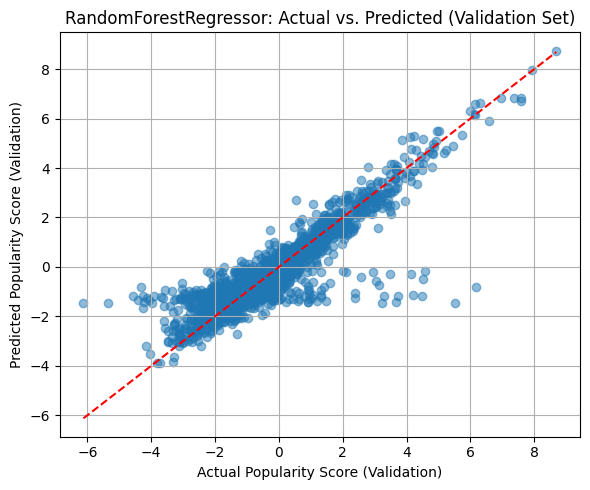

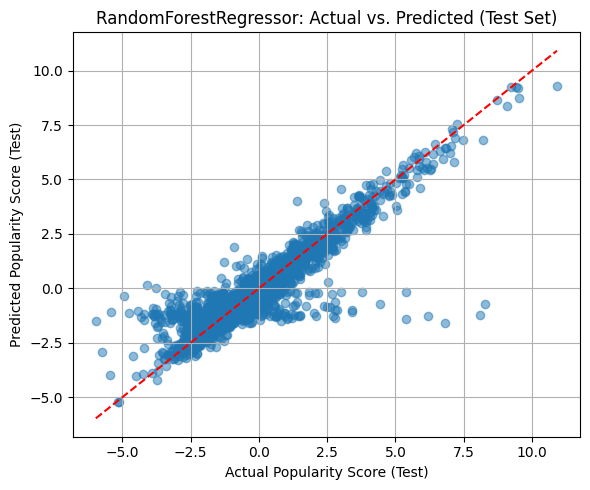

In [14]:
import matplotlib.pyplot as plt

# Create directory for model plots
plot_dir = 'outputs/model_plots'
os.makedirs(plot_dir, exist_ok=True)

# Fit the selected model using the optimized pipeline
rf_model = PipelineOptimization(RandomForestRegressor(n_estimators=105, max_depth=10, min_samples_split=7, random_state=0))
rf_model.fit(X_train, y_train)

# Predictions
y_pred_val_rf = rf_model.predict(X_val)
y_pred_test_rf = rf_model.predict(X_test)

# Actual vs. Predicted Plot (Validation)
plt.figure(figsize=(6, 5))
plt.scatter(y_val, y_pred_val_rf, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Popularity Score (Validation)")
plt.ylabel("Predicted Popularity Score (Validation)")
plt.title("RandomForestRegressor: Actual vs. Predicted (Validation Set)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

# Actual vs. Predicted Plot (Test)
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Popularity Score (Test)")
plt.ylabel("Predicted Popularity Score (Test)")
plt.title("RandomForestRegressor: Actual vs. Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

Both the validation and test plots show similar strong linear relationships, with predictions closely matching actual values. This consistency across splits indicates that the model generalizes well and that performance is stable, not just limited to the training data. This indicates that the **RandomForestRegressor** model predicts book popularity accurately for the majority of cases, with only a few outliers. The close alignment to the reference line demonstrates good model fit and reliable performance.

#### Residual Analysis

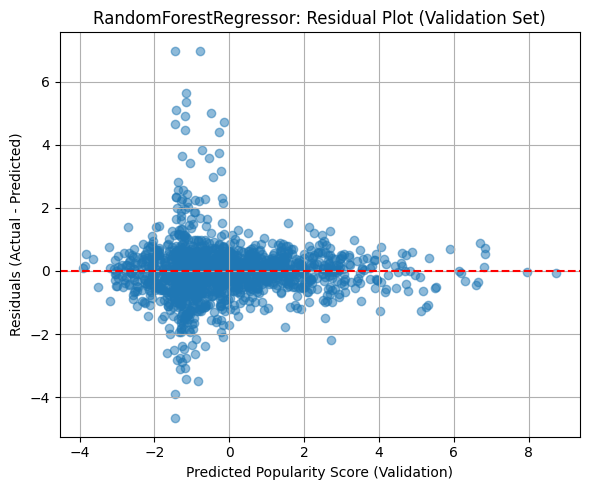

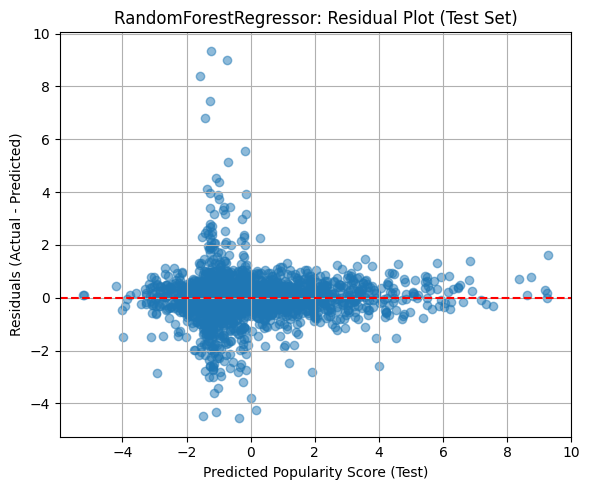

In [15]:
# Residual Analysis (Validation)
residuals_val = y_val - y_pred_val_rf
plt.figure(figsize=(6, 5))
plt.scatter(y_pred_val_rf, residuals_val, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Popularity Score (Validation)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("RandomForestRegressor: Residual Plot (Validation Set)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

# Residual Analysis (Test)
residuals_test = y_test - y_pred_test_rf
plt.figure(figsize=(6, 5))
plt.scatter(y_pred_test_rf, residuals_test, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Popularity Score (Test)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("RandomForestRegressor: Residual Plot (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

The residual plot displays the differences between actual and predicted popularity scores for each sample. Most residuals are centered around zero, indicating that the RandomForestRegressor makes unbiased predictions overall. The random scatter of points suggests a good model fit, with no clear patterns or systematic errors. However, a few larger residuals and some spread at lower predicted scores may indicate outliers or areas where the model could be improved.

Importantly, the residual patterns are consistent between the validation and test sets. Both plots show similar distributions and variance, confirming that the model's error characteristics generalize well to unseen data and are not specific to a single split. This consistency further supports the reliability and robustness of the RandomForestRegressor for predicting book popularity.

#### Feature Importance

In [16]:
from sklearn.pipeline import Pipeline

rf_model_no_selection = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', RandomForestRegressor(n_estimators=105, max_depth=10, min_samples_split=7, random_state=0))
])
rf_model_no_selection.fit(X_train, y_train)

preprocessor = rf_model_no_selection.named_steps['preprocessing'].named_steps['col_transform']
feature_names = preprocessor.get_feature_names_out()
importances = rf_model_no_selection.named_steps['model'].feature_importances_

feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
feat_imp_df.to_csv('outputs/model_plots/rf_feature_importance.csv', index=False)
print(feat_imp_df.head(10))

                                   feature  importance
4             num__external_numratings_log    0.574257
263   remainder__external_popularity_score    0.304052
7        num__external_bbe_ratings_3_share    0.029314
249         cat__publication_decade_2010.0    0.020876
1                           num__pages_log    0.006091
253             remainder__external_rating    0.005375
259       remainder__author_book_count_log    0.004799
258                   remainder__in_series    0.004053
260      remainder__description_length_log    0.003915
261  remainder__description_word_count_log    0.003835


The top features and their relative importances are as follows:

| Rank | Feature                                | Importance | Description                                         |
|------|----------------------------------------|------------|-----------------------------------------------------|
| 1    | `num__external_numratings_log`         | 0.574      | Log-transformed count of external ratings           |
| 2    | `remainder__external_popularity_score` | 0.304      | Composite external popularity metric                |
| 3    | `num__external_bbe_ratings_3_share`    | 0.029      | Share of 3-star external ratings                    |
| 4    | `cat__publication_decade_2010.0`       | 0.021      | Indicator for books published in the 2010s          |
| 5    | `num__pages_log`                       | 0.006      | Log-transformed number of pages                     |
| 6    | `remainder__external_rating`           | 0.005      | External rating value                               |
| 7    | `remainder__author_book_count_log`     | 0.005      | Log-transformed count of an author’s total books    |
| 8    | `remainder__in_series`                 | 0.004      | Indicator if book is part of a series               |
| 9    | `remainder__description_length_log`    | 0.004      | Log-transformed description length (characters)     |
| 10   | `remainder__description_word_count_log`| 0.004      | Log-transformed word count of the book description  |

**Key Insights:**
- **External signals** (ratings, popularity scores) are the strongest predictors of engagement.
- **Publication recency** (e.g., 2010s indicator) is moderately important, partially supporting the hypothesis that newer books attract more engagement.
- **Internal metadata** (pages, author book count, description length) provides additional, but less substantial, predictive value.

**Conclusion:**  
External engagement metrics are the main drivers of predicted popularity, with publication recency and select metadata features providing secondary support. This confirms previous PPS analysis and aligns with business objectives for Bookwise Analytics.

### Extra Trees Analysis (V2)

#### Visualize Actual vs. Predicted Values

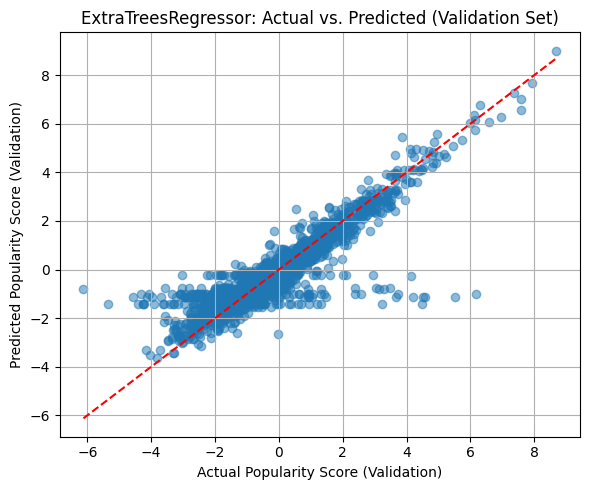

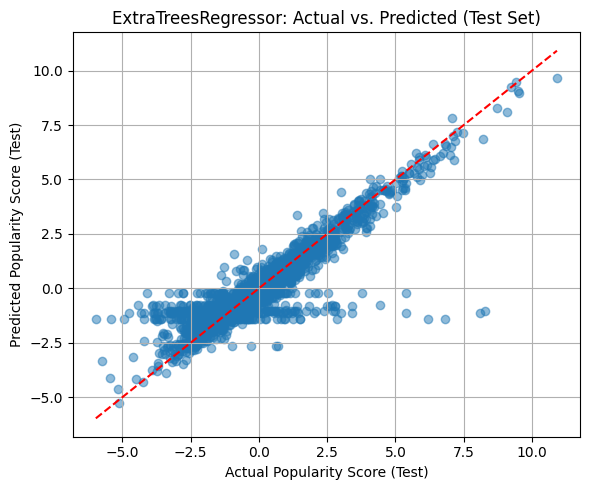

In [24]:
import matplotlib.pyplot as plt

# Create directory for model plots
plot_dir = 'outputs/model_plots'
os.makedirs(plot_dir, exist_ok=True)

# Fit the selected model using the optimized pipeline
et_model = PipelineOptimization(ExtraTreesRegressor(n_estimators=89, max_depth=10, min_samples_split=2, random_state=0))
et_model.fit(X_train, y_train)

# Predictions
y_pred_val_et = et_model.predict(X_val)
y_pred_test_et = et_model.predict(X_test)

# Actual vs. Predicted Plot (Validation)
plt.figure(figsize=(6, 5))
plt.scatter(y_val, y_pred_val_et, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Popularity Score (Validation)")
plt.ylabel("Predicted Popularity Score (Validation)")
plt.title("ExtraTreesRegressor: Actual vs. Predicted (Validation Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{plot_dir}/et_actual_vs_pred_val.png")
plt.show()
plt.close()

# Actual vs. Predicted Plot (Test)
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test_et, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Popularity Score (Test)")
plt.ylabel("Predicted Popularity Score (Test)")
plt.title("ExtraTreesRegressor: Actual vs. Predicted (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{plot_dir}/et_actual_vs_pred_test.png")
plt.show()
plt.close()

Both the validation and test plots for **RandomForestRegressor** and **ExtraTreesRegressor** show a strong linear relationship between actual and predicted popularity scores, with most points clustered around the diagonal reference line. This pattern is consistent across both splits, indicating that each model generalizes well and maintains stable performance on unseen data. **ExtraTreesRegressor** exhibits slightly tighter clustering along the diagonal in both validation and test sets, suggesting marginally better predictive accuracy and less spread in errors. While both models show a few outliers, the overall fit and error distribution remain very similar between validation and test sets, further supporting their reliability.

#### Residual Analysis

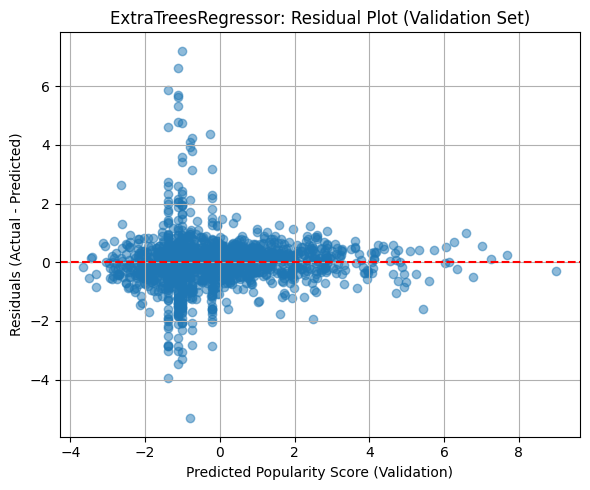

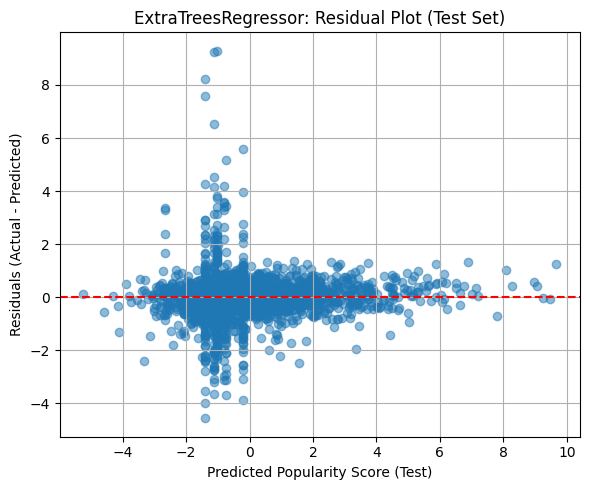

In [18]:
# Residual Analysis (Validation)
residuals_val_et = y_val - y_pred_val_et
plt.figure(figsize=(6, 5))
plt.scatter(y_pred_val_et, residuals_val_et, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Popularity Score (Validation)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("ExtraTreesRegressor: Residual Plot (Validation Set)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

# Residual Analysis (Test)
residuals_test_et = y_test - y_pred_test_et
plt.figure(figsize=(6, 5))
plt.scatter(y_pred_test_et, residuals_test_et, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Popularity Score (Test)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("ExtraTreesRegressor: Residual Plot (Test Set)")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

**ExtraTreesRegressor** shows slightly less spread and tighter clustering of residuals, especially for mid-range predicted scores, indicating marginally more consistent predictions. Both models have some outliers and larger residuals at lower predicted scores, but ExtraTreesRegressor appears to have fewer extreme values. Importantly, the residual distributions for ExtraTreesRegressor are very similar between the validation and test sets, with comparable variance and error patterns. This consistency across splits further confirms the model's reliability and generalizability compared to RandomForestRegressor.

#### Feature Importance

In [20]:
from sklearn.pipeline import Pipeline

et_model_no_selection = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', ExtraTreesRegressor(n_estimators=89, max_depth=10, min_samples_split=2, random_state=0))
])
et_model_no_selection.fit(X_train, y_train)

preprocessor = et_model_no_selection.named_steps['preprocessing'].named_steps['col_transform']
feature_names = preprocessor.get_feature_names_out()
importances = et_model_no_selection.named_steps['model'].feature_importances_

feat_imp_df_et = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)
feat_imp_df_et.to_csv('outputs/model_plots/et_feature_importance.csv', index=False)
print(feat_imp_df_et.head(10))

                                  feature  importance
4            num__external_numratings_log    0.376327
263  remainder__external_popularity_score    0.259536
3                 num__external_votes_log    0.113337
2                 num__external_score_log    0.089279
7       num__external_bbe_ratings_3_share    0.037366
249        cat__publication_decade_2010.0    0.030773
253            remainder__external_rating    0.015183
9       num__external_bbe_ratings_5_share    0.010298
6       num__external_bbe_ratings_2_share    0.008444
258                  remainder__in_series    0.007593


The top features and their relative importances for **ExtraTreesRegressor** are as follows:

| Rank | Feature                                | Importance | Description                                  |
|------|----------------------------------------|------------|----------------------------------------------|
| 1    | `num__external_numratings_log`         | 0.376      | Log-transformed count of external ratings    |
| 2    | `remainder__external_popularity_score` | 0.260      | Composite external popularity metric         |
| 3    | `num__external_votes_log`              | 0.113      | Log-transformed external votes               |
| 4    | `num__external_score_log`              | 0.089      | Log-transformed external score               |
| 5    | `num__external_bbe_ratings_3_share`    | 0.037      | Share of 3-star external ratings             |
| 6    | `cat__publication_decade_2010.0`       | 0.031      | Indicator for books published in 2010s       |
| 7    | `remainder__external_rating`           | 0.015      | External rating value                        |
| 8    | `num__external_bbe_ratings_5_share`    | 0.010      | Share of 5-star external ratings             |
| 9    | `num__external_bbe_ratings_2_share`    | 0.008      | Share of 2-star external ratings             |
| 10   | `remainder__in_series`                 | 0.008      | Indicator if book is part of a series        |


**Key Insights:**
- ExtraTreesRegressor places greater emphasis on **volume-based external metrics** (number of ratings, votes, and log transformed scores).
- Both models highlight the importance of **external popularity signals** and **publication recency**.
- ExtraTreesRegressor gives more weight to raw counts and log-transformed external metrics, suggesting it captures engagement volume more directly.

**Difference vs. Random Forest:**
- Both models rank `num__external_numratings_log` and `remainder__external_popularity_score` as the top features, but RandomForestRegressor assigns much higher importance to `num__external_numratings_log` (over 55%), making its predictions more dependent on this single metric.
- ExtraTreesRegressor distributes feature importance more evenly across several external metrics, including votes, scores, and multiple rating shares, while RandomForestRegressor is more concentrated on just a few features.
- ExtraTreesRegressor incorporates additional external metrics (votes, scores, multiple rating shares) into its top features, whereas RandomForestRegressor’s top features are dominated by rating counts and popularity score.

**Conclusion:**  
This suggests RandomForestRegressor is more sensitive to the volume of ratings, while ExtraTreesRegressor captures a broader spectrum of engagement signals, potentially leading to more balanced predictions.

#### SHAP Analysis


SHAP summary plot saved to outputs/model_plots/et_shap_summary.png


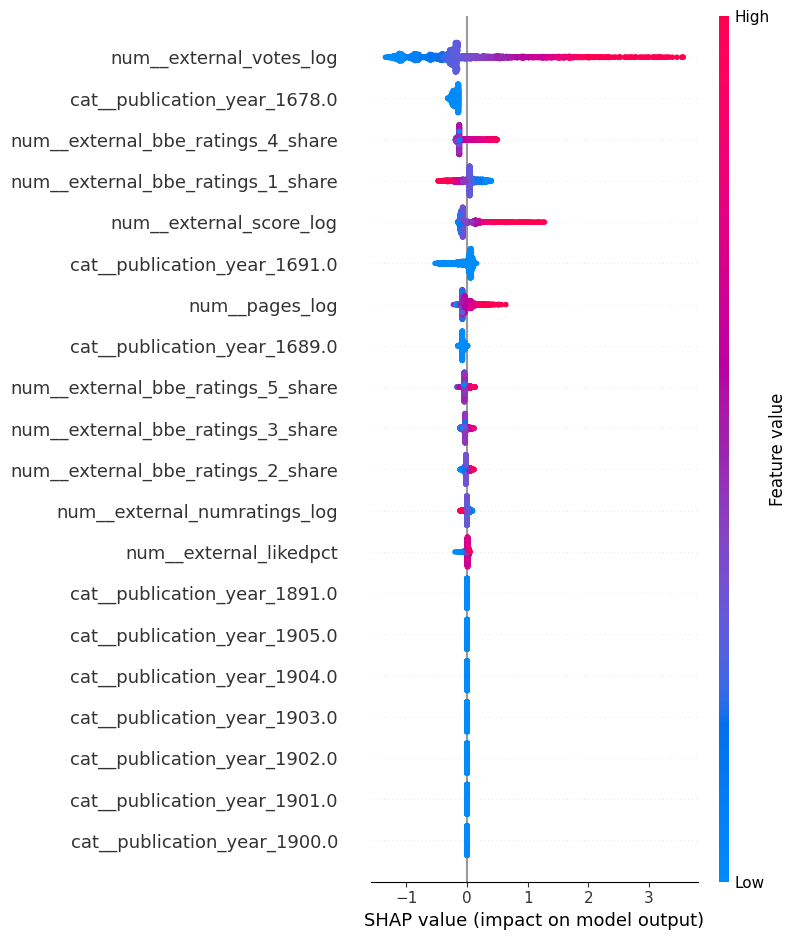

In [21]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import os

# Get the preprocessed test data (without fitting again)
X_test_transformed = et_model.named_steps['preprocessing'].transform(X_test)

# Get the trained ExtraTreesRegressor from the pipeline
model = et_model.named_steps['model']

# Create SHAP explainer
explainer = shap.TreeExplainer(model)

if hasattr(X_test_transformed, "toarray"):  # handle sparse matrices
    X_test_transformed = X_test_transformed.toarray()
X_test_transformed = np.array(X_test_transformed, dtype=np.float32)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Get feature names after preprocessing
feature_names = et_model.named_steps['preprocessing'].named_steps['col_transform'].get_feature_names_out()

# Ensure output directory exists
plot_dir = 'outputs/model_plots'
os.makedirs(plot_dir, exist_ok=True)

# Generate and save SHAP summary plot
plt.figure()
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, show=False)
plt.tight_layout()
# plt.savefig(os.path.join(plot_dir, 'et_shap_summary.png'))
plt.close()
print("SHAP summary plot saved to outputs/model_plots/et_shap_summary.png")

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, show=True)

# Force plot for a single prediction (interactive, not saved)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=feature_names)

The summary plot confirms that external engagement metrics (votes, ratings, rating shares) are the strongest drivers of model predictions, with publication year and page count playing a secondary role. The color gradient helps interpret how high or low feature values affect the output.

### Alternatives Explored

#### PCA 

Principal Component Analysis (PCA) was implemented as a dimensionality reduction step for numeric features. While the first principal component (`num__pca0`) showed moderate SHAP impact, feature importance analysis consistently identified `external_popularity_score` as the most predictive variable, regardless of PCA usage. Model performance did not visibly improve with PCA, and overall explainability was reduced due to the loss of direct feature interpretability. Based on these results, PCA was not adopted in the final pipeline. Direct use of original features remains preferable for both accuracy and business transparency.

```python
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=42))
])

preprocessing_pipeline = Pipeline([
    ('drop_cols', DropColumns(drop_cols)),
    ('fill_minus1', FillNAWithValue(fill_minus1_cols, -1)),
    ('add_flags', AddMissingFlags(flag_cols)),
    ('col_transform', ColumnTransformer([
        ('num', num_pipeline, num_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_cols)
    ], remainder='passthrough')),
])
```

#### Feature Selection: Balanced External and Internal Signals

To improve interpretability and align with business hypotheses, the feature set was trimmed to balance external and internal signals. Redundant raw rating counts (e.g. `external_bbe_ratings_4`) were removed in favor of their relative share equivalents (e.g.` external_bbe_ratings_4_share`). The selected features now directly reflect key business questions, such as the impact of external popularity metrics versus internal metadata like genre, page count, and publication year. Removing said redundancies enhanced model transparency without sacrificing predictive power, facilitating clearer insights for Bookwise Analytics stakeholders.

## Model Readiness and Business Justification

Given the business requirements for Bookwise Analytics, the current **ExtraTreesRegressor** model is suitable for a v3 deployment:

- **Purpose:** The model is designed to inform decision makers and support the editorial team, not to automate final curation.
- **Performance:** With a test R² of 0.81 and RMSE of 0.95, the ExtraTreesRegressor explains 81% of the variance and keeps average prediction error below 1 point. On the validation set, the model achieved an R² of 0.80 and RMSE of 0.88, demonstrating consistent and reliable predictive accuracy across both splits. The actual vs. predicted plot shows a strong linear relationship, with most predictions closely matching true values and only a few outliers. The residual plot confirms that errors are centered around zero and randomly distributed, indicating unbiased predictions and no major systematic issues.
- **Risk:** The business risk is low. Editorial expertise will remain in the loop, so any model errors can be caught and corrected before impacting users.
- **Business Fit:** Variance in average ratings is expected and acceptable for curation. The model provides a data-driven baseline to guide decisions, not replace human judgment.

**Conclusion:**  
It is justifiable to move forward with this model as a v2. ExtraTreesRegressor demonstrates strong predictive accuracy and reliability in visual diagnostics, meets business needs, supports decision making, and fits within the risk profile. Further improvements can be made iteratively as more data and feedback are collected.

In [22]:
import json
import os
import joblib

v = '3'
model_dir = f'outputs/models/extratree/{v}/'
os.makedirs(model_dir, exist_ok=True)

# Save et_model pipeline as .pkl
joblib.dump(et_model, os.path.join(model_dir, 'et_model.pkl'))

print(f"Model saved to {os.path.join(model_dir, 'et_model.pkl')}")

# find Model result by name
metrics = next(r for r in results if r["name"] == "ExtraTreesRegressor")

metrics_dict = {
    "rmse": metrics["test_rmse"],
    "r2": metrics["test_r2"],
    "mae": metrics["test_mae"]
}
with open(os.path.join(model_dir, "metrics.json"), "w") as f:
    json.dump(metrics_dict, f)

Model saved to outputs/models/extratree/3/et_model.pkl


In [23]:
import os
from dotenv import load_dotenv
from huggingface_hub import HfApi
from pathlib import Path

load_dotenv() 
# Set up Hugging Face API
api = HfApi()
repo_id = "revolucia/popularity-score-model"
repo_type = "model"
HF_TOKEN = os.getenv("HUGGINGFACE_MODEL_TOKEN")

model_dir = Path(f"outputs/models/extratree/{v}/")
model_path = model_dir / "et_model.pkl"

if model_path.exists() and HF_TOKEN:
    print(f"Uploading model: {model_path.name} ...")
    api.upload_file(
        path_or_fileobj=str(model_path),
        path_in_repo=f"modeling_data/{model_path.name}",
        repo_id=repo_id,
        repo_type=repo_type,
        token=HF_TOKEN
    )
    print(f"Uploaded: {model_path.name}\n")
else:
    print(f"File not found or missing HF_TOKEN: {model_path}")

print("Model upload process completed.")

Uploading model: et_model.pkl ...


et_model.pkl:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

Uploaded: et_model.pkl

Model upload process completed.
